# Business objective

Developing a reliable system for early identification of brain tumors, leading to timely intervention to improve survival rates

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics

# Load and Preprocess Data

In [3]:
base_dir = 'brain_tumor_dataset/'
yes_dir = os.path.join(base_dir, 'yes')
no_dir = os.path.join(base_dir, 'no')

img_size = (128, 128)
batch_size = 253

datagen = ImageDataGenerator(rescale=1./255,rotation_range=20 , validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 202 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


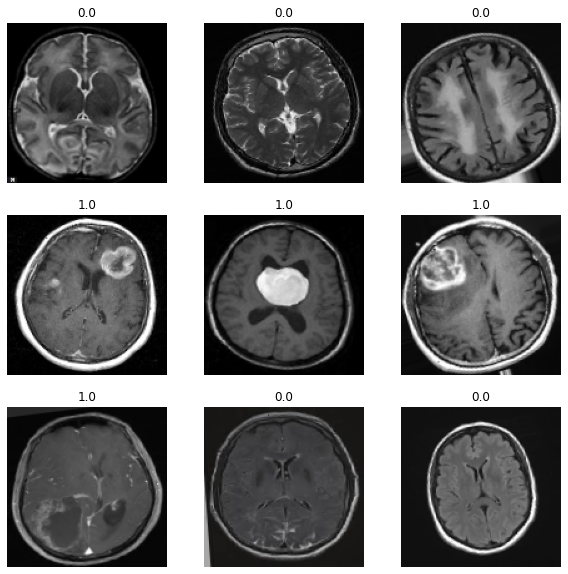

In [4]:
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off') 
plt.show()

# Building the model

### Convolutional Neural Network CNN

specialized type of artificial neural network designed to process structured grid data, such as images. CNNs are particularly effective in tasks related to image recognition, classification, and computer vision due to their ability to automatically and adaptively learn spatial hierarchies of features from input images.

#### CNN Components

* Convolution layer : These layers apply convolutional filters (kernels) to the input data to extract features. Each filter learns to detect specific patterns such as edges, textures, or shapes.The filter slides/convolves across the input image, performing element-wise multiplication and summation to produce feature maps.


* Activation Functions : Non-linear activation functions, like ReLU , are applied after convolution to introduce non-linearity into the model, allowing it to learn complex patterns.


* Pooling Layers : These layers downsample the feature maps to reduce their spatial dimensions, which helps decrease the computational load and reduces the risk of overfitting.Common pooling methods include Max Pooling and Average Pooling .


* Fully Connected Layers:At the end of the CNN, fully connected layers combine the features learned by the convolutional and pooling layers to make final predictions.These layers operate similarly to traditional neural networks, where every neuron is connected to all neurons in the previous layer.


* Output Layer: The output layer produces the final predictions using activation functions like Softmax for multi-class classification or Sigmoid for binary classification.

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy' , metrics.Recall()])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [7]:
history = model.fit(train_generator, epochs=40, validation_data = validation_generator, steps_per_epoch=len(train_generator))

Epoch 1/40
1/1 [==============================] - 8s 8s/step - loss: 0.7041 - accuracy: 0.3911 - recall: 0.2097 - val_loss: 0.8144 - val_accuracy: 0.6122 - val_recall: 1.0000
Epoch 2/40
1/1 [==============================] - 6s 6s/step - loss: 0.8090 - accuracy: 0.6139 - recall: 1.0000 - val_loss: 0.6289 - val_accuracy: 0.7143 - val_recall: 0.7000
Epoch 3/40
1/1 [==============================] - 6s 6s/step - loss: 0.6240 - accuracy: 0.7030 - recall: 0.6290 - val_loss: 0.6097 - val_accuracy: 0.7143 - val_recall: 0.7667
Epoch 4/40
1/1 [==============================] - 6s 6s/step - loss: 0.6027 - accuracy: 0.7475 - recall: 0.7258 - val_loss: 0.5661 - val_accuracy: 0.7347 - val_recall: 0.8667
Epoch 5/40
1/1 [==============================] - 6s 6s/step - loss: 0.5668 - accuracy: 0.7822 - recall: 0.8871 - val_loss: 0.5475 - val_accuracy: 0.7551 - val_recall: 0.9000
Epoch 6/40
1/1 [==============================] - 6s 6s/step - loss: 0.5270 - accuracy: 0.7673 - recall: 0.9194 - val_loss: 0

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Model accuracy and loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Testing the model on two images weren't in the training or validation data**

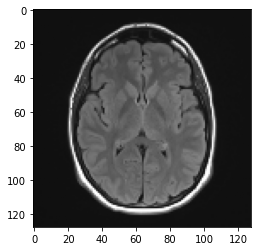

In [9]:
import cv2
no_test_image = cv2.imread('brain_tumor_dataset/no.jpg')
no_test_image = cv2.resize(no_test_image, (128, 128))/255
plt.imshow(no_test_image)

In [10]:
# Expand dimensions to match the model input shape
no_test = np.expand_dims(no_test_image, axis=0)  # Shape (1, 128, 128, 3)

In [11]:
ypred1 = model.predict(no_test)
if ypred1 > .5 :
    print ('Failed')
else :
    print('Success')

1/1 [==============================] - 0s 170ms/step
Success


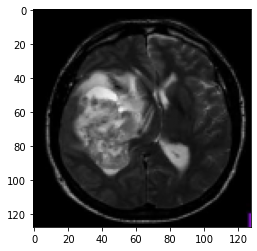

In [12]:
yes_test_image = cv2.imread('brain_tumor_dataset/Y259.jpg')
yes_test_image = cv2.resize(yes_test_image, (128, 128))/255
plt.imshow(yes_test_image)

In [13]:
yes_test = np.expand_dims(yes_test_image, axis=0) 

In [14]:

ypred2 = model.predict(yes_test)
if ypred2 < .5 :
    print ('Failed')
else :
    print('Success')

1/1 [==============================] - 0s 33ms/step
Success


# Saving the model

In [15]:
model.save('brain_tumor_identifier.h5')

In [16]:
loaded_model = load_model('brain_tumor_identifier.h5')

In [17]:
ypred3 = loaded_model.predict(yes_test)
if ypred3 < .5 :
    print ('Failed')
else :
    print('Success')

1/1 [==============================] - 0s 115ms/step
Success
